<a href="https://colab.research.google.com/github/ZehanQin/ECON5200-Applied-Data-Analytics-in-Econ/blob/main/Lab%201/%5BLab_1_Completed%5D_%22Hello%2C_Pandas%22_%26_The_Digital_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1
import pandas as pd
import numpy as np

In [5]:
data = {
    'country':['United States','Argentina','Australia','Brazil','Britain','China','Egypt','Euro area','Hong Kong','Indonesia','Japan','Mexico','Norway','Pakistan','Philippines','Russia','Saudi Arabia','South Africa','South Korea'],
    'iso_a3':['USA','ARG','AUS','BRA','GBR','CHN','EGY','EUZ','HKG','IDN','JPN','MEX','NOR','PAK','PHL','RUS','SAU','ZAF','KOR'],
    'local_price':[4.79,28.00,5.30,13.50,2.89,17.20,16.93,3.68,18.80,27939,370,49.00,48.00,300,163,89.00,11.00,25.50,4100],
    'price_usd':[4.79,3.25,4.32,5.21,4.37,2.77,2.30,4.26,2.43,2.24,3.14,3.35,6.30,2.98,3.67,1.36,2.93,2.22,3.78],
    'dollar_ex':[1.00,8.62,1.23,2.59,0.66,6.21,7.36,0.86,7.74,12472,117.83,14.63,7.62,100.67,44.41,65.44,3.75,11.49,1084.66],
    }

# Convet to DataFrame
df = pd.DataFrame(data)
print(df)

          country iso_a3  local_price  price_usd  dollar_ex
0   United States    USA         4.79       4.79       1.00
1       Argentina    ARG        28.00       3.25       8.62
2       Australia    AUS         5.30       4.32       1.23
3          Brazil    BRA        13.50       5.21       2.59
4         Britain    GBR         2.89       4.37       0.66
5           China    CHN        17.20       2.77       6.21
6           Egypt    EGY        16.93       2.30       7.36
7       Euro area    EUZ         3.68       4.26       0.86
8       Hong Kong    HKG        18.80       2.43       7.74
9       Indonesia    IDN     27939.00       2.24   12472.00
10          Japan    JPN       370.00       3.14     117.83
11         Mexico    MEX        49.00       3.35      14.63
12         Norway    NOR        48.00       6.30       7.62
13       Pakistan    PAK       300.00       2.98     100.67
14    Philippines    PHL       163.00       3.67      44.41
15         Russia    RUS        89.00   

In [7]:
df['dollar_price']=df['local_price']/df['dollar_ex']
us_price=df.loc[df['iso_a3']=='USA','dollar_price'].values
df['implied_ppp']=df['local_price']/us_price
df['valuation']=(df['implied_ppp']-df['dollar_ex'])/df['dollar_ex']
df['valuation_pct']=df['valuation']*100
print(df[['country','dollar_price','valuation_pct']].sort_values('valuation_pct'))


          country  dollar_price  valuation_pct
15         Russia      1.360024     -71.607005
17   South Africa      2.219321     -53.667617
9       Indonesia      2.240138     -53.233029
6           Egypt      2.300272     -51.977625
8       Hong Kong      2.428941     -49.291429
5           China      2.769726     -42.176905
16   Saudi Arabia      2.933333     -38.761308
13       Pakistan      2.980034     -37.786351
10          Japan      3.140117     -34.444319
1       Argentina      3.248260     -32.186642
11         Mexico      3.349282     -30.077614
14    Philippines      3.670345     -23.374854
18    South Korea      3.779986     -21.085880
7       Euro area      4.279070     -10.666602
2       Australia      4.308943     -10.042942
4         Britain      4.378788      -8.584804
0   United States      4.790000       0.000000
3          Brazil      5.212355       8.817437
12         Norway      6.299213      31.507570


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1961663481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valuation_pct',y='country',data=df.sort_values('valuation_pct'),palette='vlag')


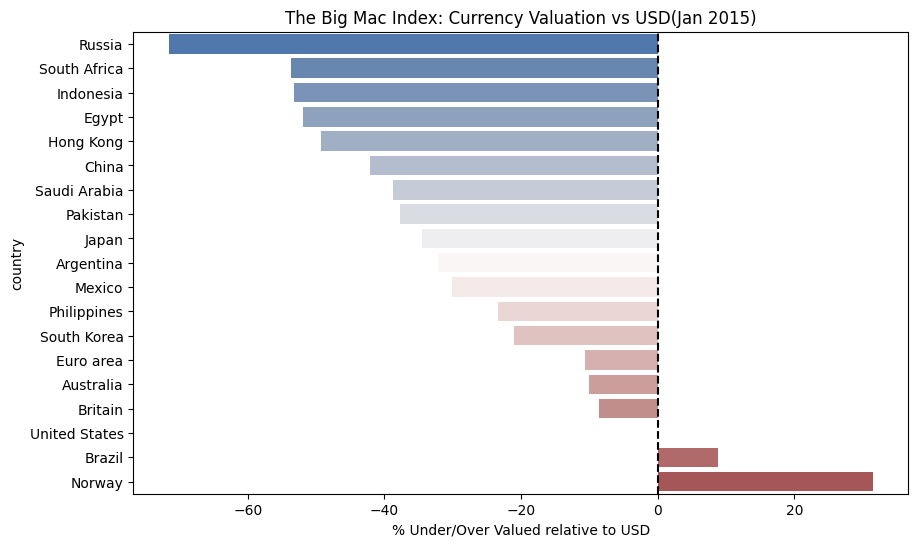

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='valuation_pct',y='country',data=df.sort_values('valuation_pct'),palette='vlag')
plt.axvline(x=0,color='black',linestyle='--')
plt.title('The Big Mac Index: Currency Valuation vs USD(Jan 2015)')
plt.xlabel('% Under/Over Valued relative to USD')
plt.show()

In [13]:
url='https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'

full_df=pd.read_csv(url)

print(full_df.columns)
print(full_df.head())

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_bigmac', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')
         date iso_a3 currency_code         name  local_price  dollar_ex  \
0  2000-04-01    ARG           ARS    Argentina         2.50       1.00   
1  2000-04-01    AUS           AUD    Australia         2.59       1.68   
2  2000-04-01    BRA           BRL       Brazil         2.95       1.79   
3  2000-04-01    CAN           CAD       Canada         2.85       1.47   
4  2000-04-01    CHE           CHF  Switzerland         5.90       1.70   

   dollar_price  USD_raw  EUR_raw  GBP_raw  JPY_raw  CNY_raw    GDP_bigmac  \
0      2.500000  0.11607  0.05007 -0.16722 -0.09864  1.09091   8317.724800   
1      1.541667 -0.31176 -0.35246 -0.48645 -0.44416  0.28939  28023.744000   
2      1.648045